In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
target=df.target
data=df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','ca','thal']]

In [5]:
print(data.shape)
print(target.shape)

(303, 14)
(303,)


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
ca          0
thal        0
dtype: int64

No null values in the datasets 


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  ca        303 non-null    int64  
 13  thal      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,4.000000,3.000000


In [9]:
import seaborn as sns

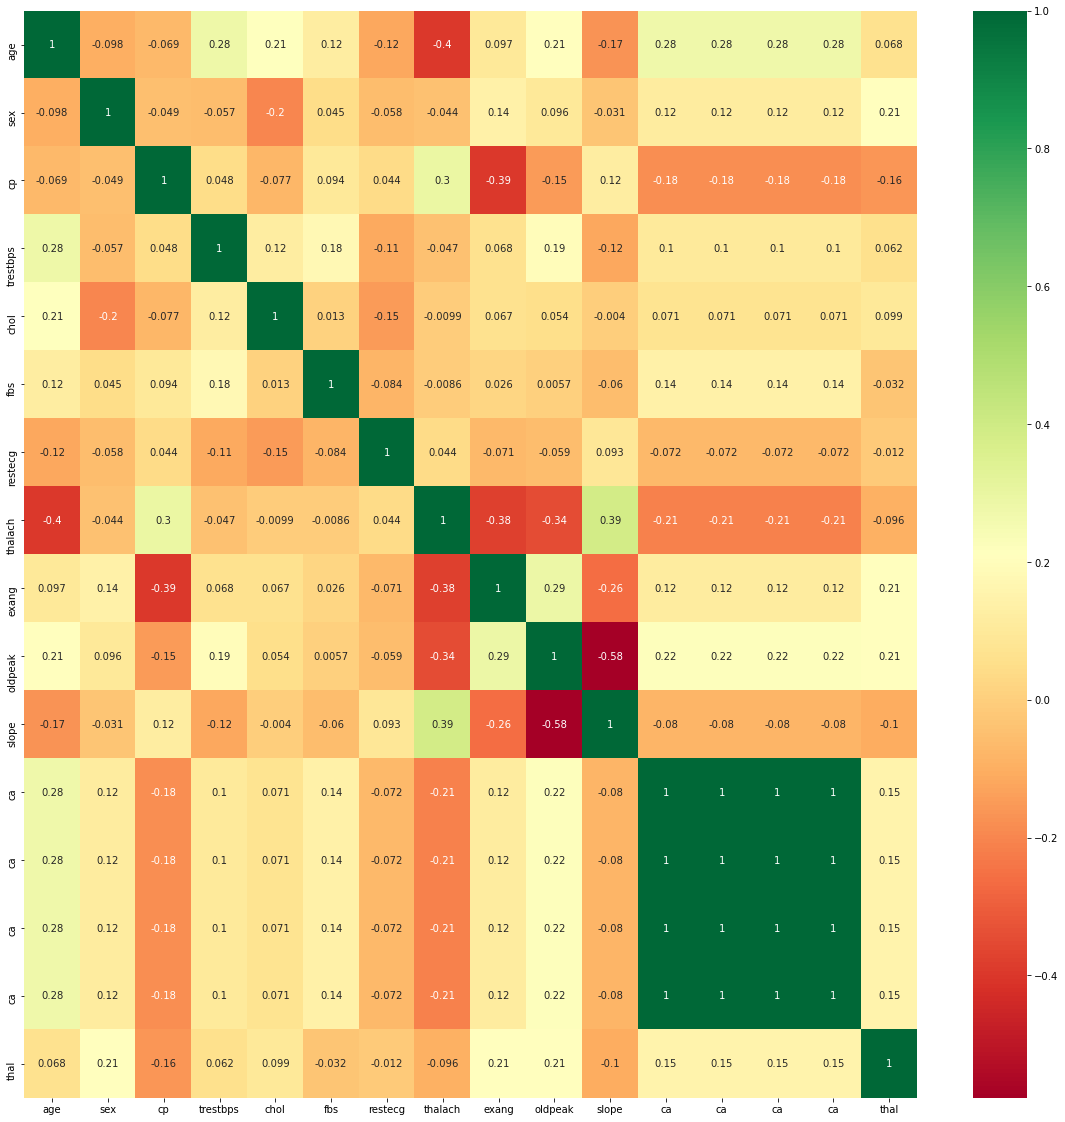

In [10]:
cormat=data.corr()
corr_features=cormat.index

plt.figure(figsize=(20,20))

g=sns.heatmap(data[corr_features].corr(),annot=True,cmap='RdYlGn')

C:\Users\Lenovo\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

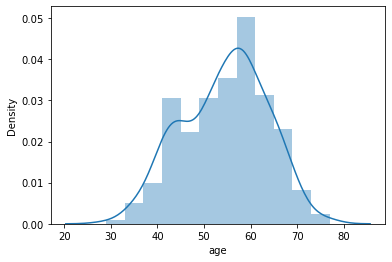

In [11]:
sns.distplot(data.age)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1440x1440 with 0 Axes>

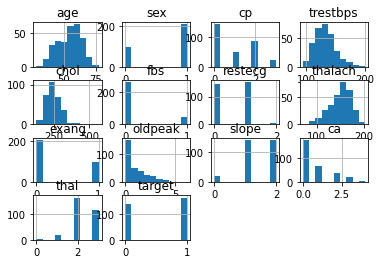

In [12]:
plt.figure(figsize=(20,20))
df.hist()

Converting categorical variables into dummy variables 
and then scaling the training the machine learning model

In [13]:
dataset=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [14]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [15]:
dataset.shape

(303, 31)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
standardScaler=StandardScaler()


columns_to_scale=['age','trestbps','chol','thalach','oldpeak']

In [18]:
dataset[columns_to_scale]=standardScaler.fit_transform(dataset[columns_to_scale])

In [19]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [20]:
from sklearn.neighbors import KNeighborsClassifier


In [21]:
'target' in dataset.columns

True

In [22]:
dataset.target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
y=dataset.target
x=dataset.drop(['target'],axis=1)

In [24]:
from sklearn.model_selection import cross_val_score


In [25]:
knn_scores=[]

for k in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    
    
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors classifiers for different values of K')

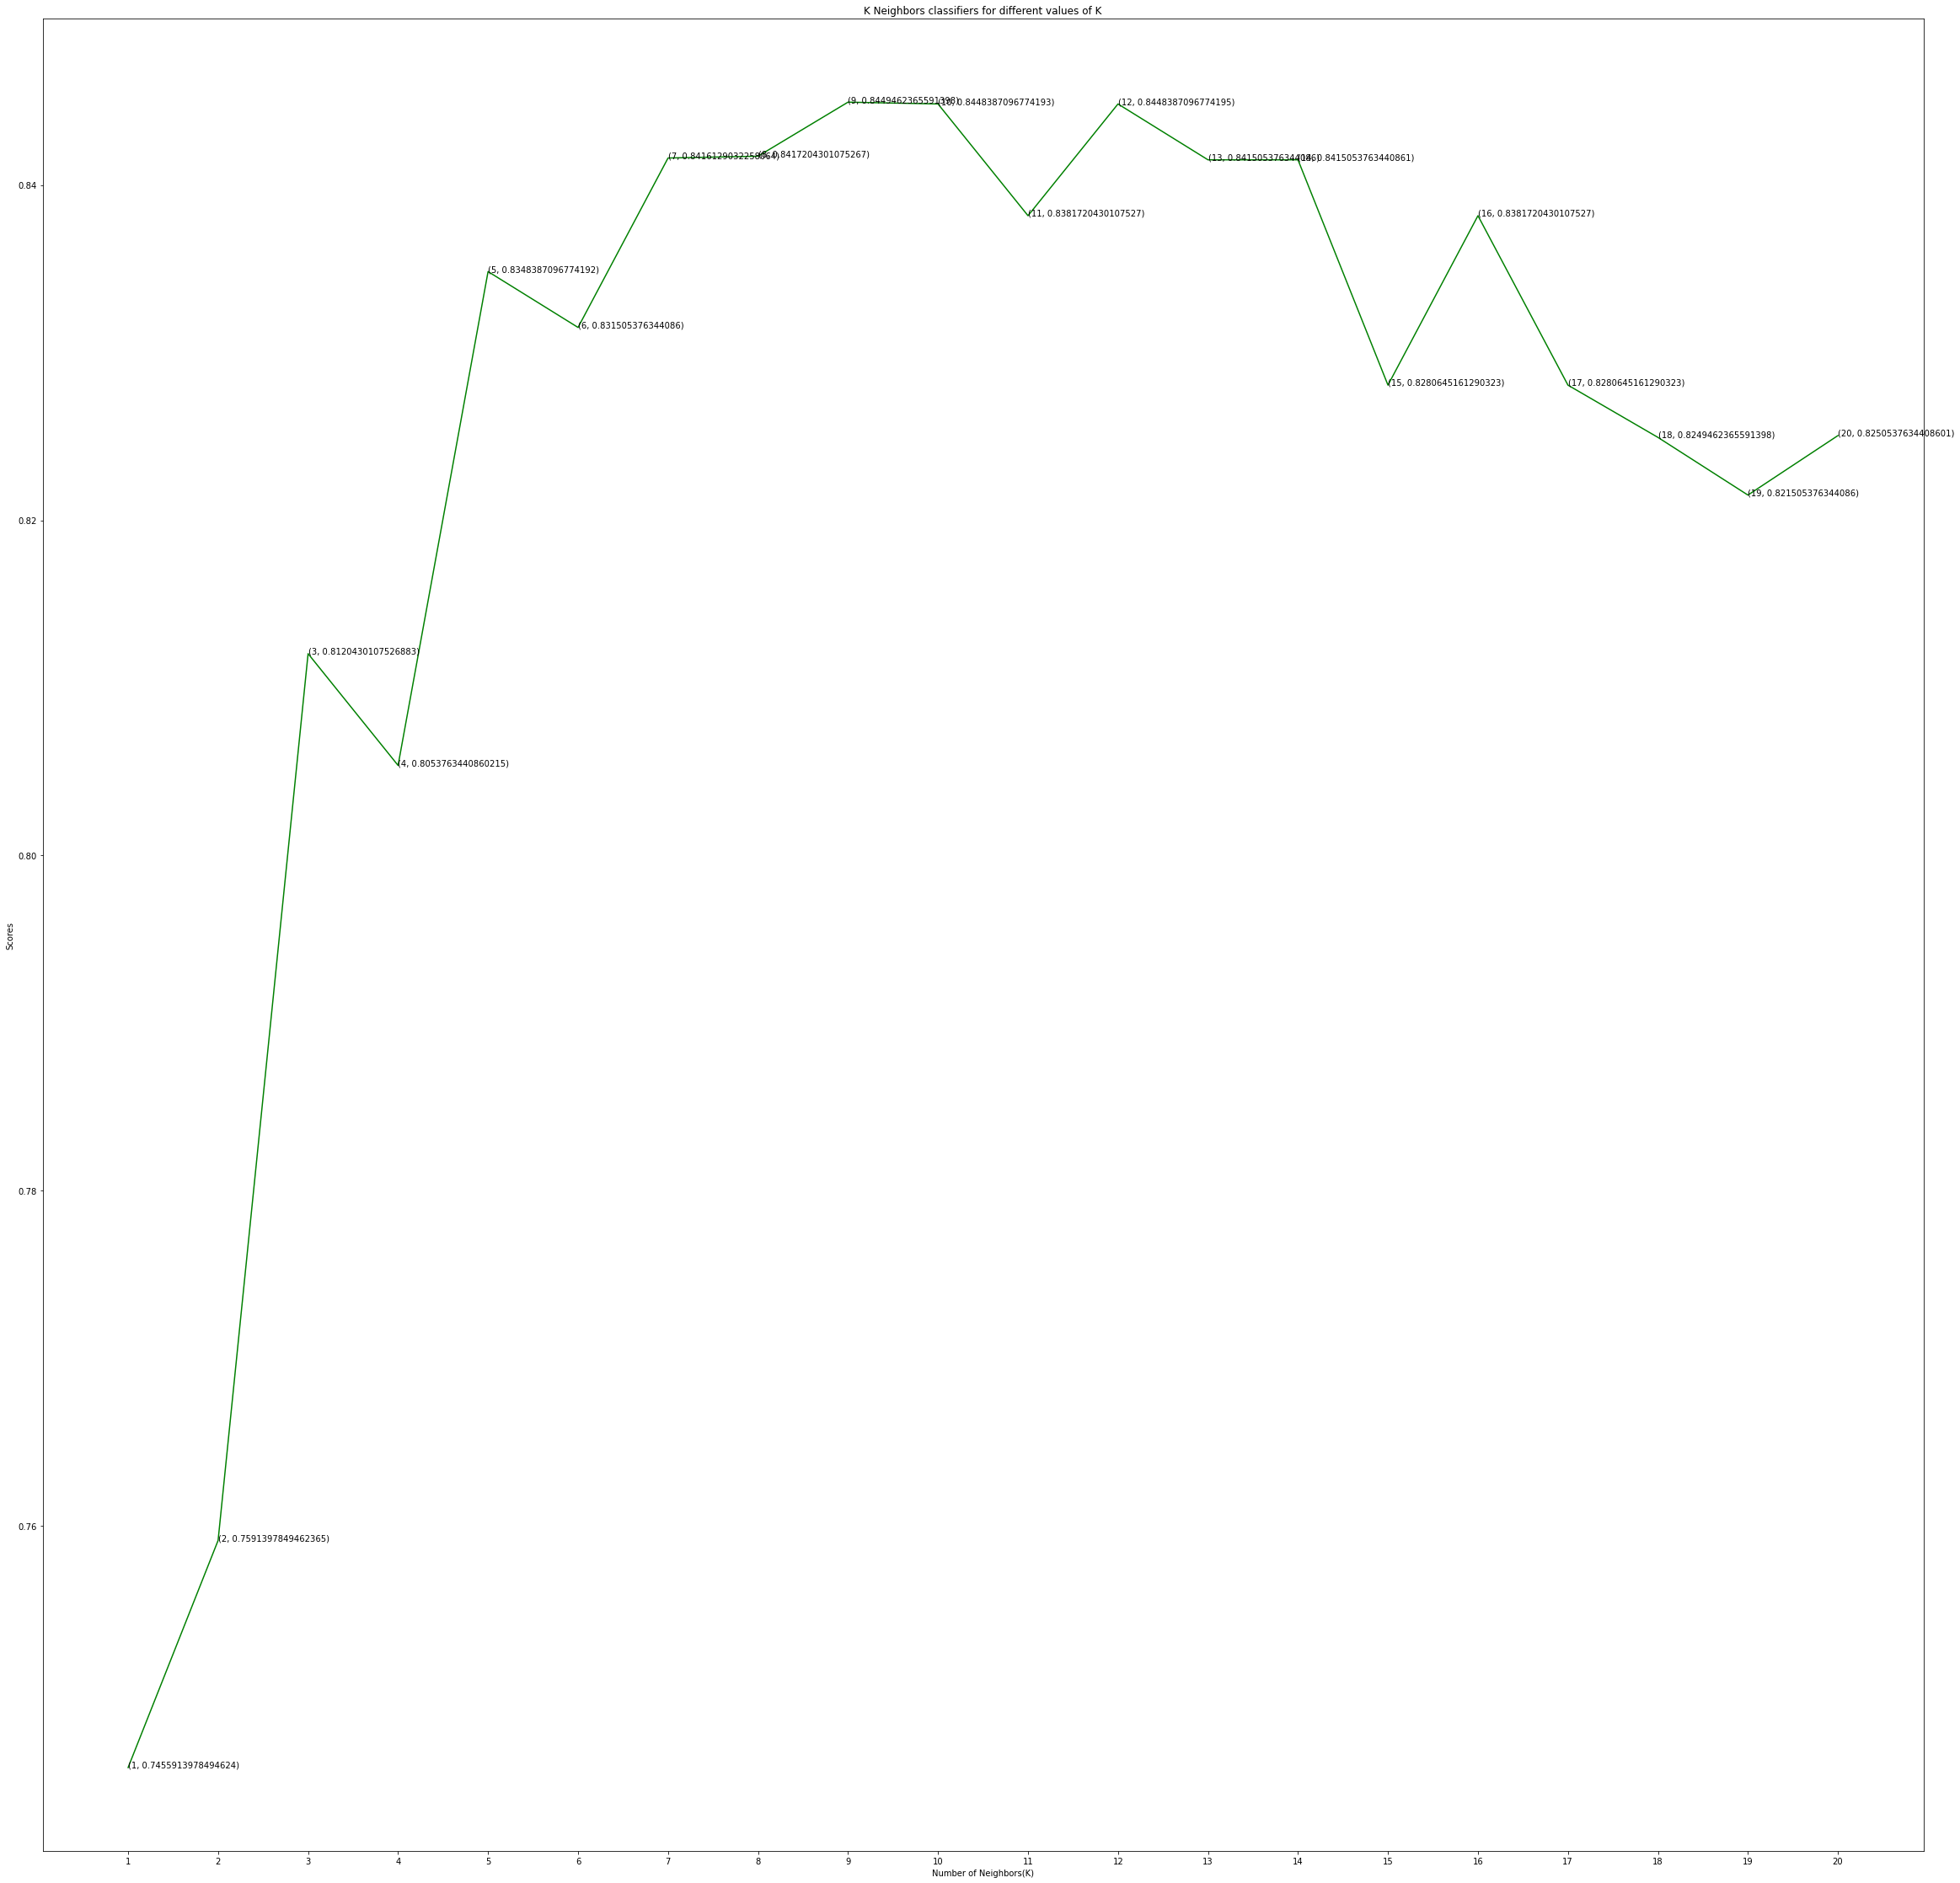

In [26]:
plt.figure(figsize=(40,40))
plt.plot([k for k in range(1,21)],knn_scores,color='green')
for i in range(1,21):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Scores')


plt.title('K Neighbors classifiers for different values of K')

In [27]:
np.argmax(knn_scores)

8

as we can see in the figure that the maximum accuracy is obtained when we have train KNN with 8 neighbors 

In [28]:
knn_scores[8]

0.8449462365591398

In [29]:
print(x.shape)
print(y.shape)

(303, 30)
(303,)


#### Training KNN classifier with 8 neighbors:

In [31]:
knn_classifier=KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(x,y)

KNeighborsClassifier(n_neighbors=8)

In [34]:
a=np.array(x.iloc[0])

In [36]:
a=a.reshape(1,-1)
print(a.shape)

(1, 30)


In [37]:
knn_classifier.predict(a)

array([1], dtype=int64)

In [38]:
import joblib

In [39]:
file_name=joblib.dump(knn_classifier,'KNN8_84')

#### using logistic regression


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=0,test_size=0.1)

In [56]:
#Log_reg=LogisticRegression().fit(x_train,y_train)
Log_reg=LogisticRegression().fit(x,y)

In [57]:
#scores = cross_val_score(Log_reg, X_train, y_train, cv=10)
scores = cross_val_score(Log_reg, x,y ,cv=10)

In [58]:
scores.mean()

0.8511827956989247

the accuracy of logistic regression is around 85 which is roughly equal to that of KNN

In [59]:
joblib.dump(Log_reg,'LOG_REG_85')

['LOG_REG_85']

#  Using Random Forest

In [60]:
from  sklearn.ensemble import RandomForestClassifier

In [63]:
random_forest=RandomForestClassifier(n_estimators=5)
scores=cross_val_score(random_forest,x,y,cv=10)

In [64]:
scores.mean()

0.8016129032258064

In [65]:
random_forest.fit(x,y)

RandomForestClassifier(n_estimators=5)

In [66]:
random_forest.predict(a)

array([1], dtype=int64)

In [67]:
joblib.dump(random_forest,'Random_forest80')

['Random_forest80']

as we have trained 3 classification model
<br>

1. KNN with 8neighbors with accuracy 84
2. Logistic regression with 85 % acc.
3. Random Forest with 80% acc
